[[ 1.         -0.09653407]
 [-0.09653407  1.        ]]


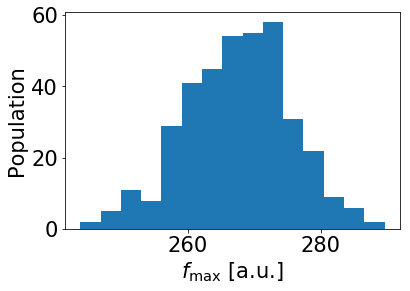

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 18 22:30:19 2018

@author: mahfuz
"""
import numpy as np
import scipy.io as sio 
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 21}
matplotlib.rc('font', **font)
matplotlib.rcParams['lines.linewidth'] = 2

# read binary data
data = sio.loadmat('180518_ch02v050r16d3_int266_time10000.mat')

# Extract WID and RTN data
fmax_ary = np.array([])
dfof_ary = np.array([])
for key, value in data.items():
    if key[0] == '_':
        continue
    
    fmax_ary = np.append(fmax_ary, value.max())
    dfof_ary = np.append(dfof_ary, (value.max() - value.min()) / value.max() * 100)

wid_data = (fmax_ary - fmax_ary.mean()) / fmax_ary.mean() * 100
wid_pp = stats.probplot(wid_data)
rtn_pp = stats.probplot(dfof_ary)

print(np.corrcoef(wid_data, dfof_ary))


plt.cla()

plt.hist(fmax_ary, 15)
plt.xlabel('$f_\mathrm{max}$ [a.u.]')
plt.ylabel('Population')

#plt.hist(dfof_ary, 20)
#plt.xlabel('$\Delta f / f$ [%]')
#plt.ylabel('Population')

#plt.plot(wid_pp[0][1], wid_pp[0][0], 'ko', markersize=10, label='WID')
#plt.plot(rtn_pp[0][1], rtn_pp[0][0], 'b^', markersize=10, label='RTN')

#plt.plot(fmax_ary, dfof_ary, 'ko', markersize=12)

#plt.xlabel('$f_\mathrm{max}$ [a.u.]')
#plt.ylabel('$\Delta f / f$ [%]')


#plt.legend()
#plt.grid()
plt.show()
